# GA Data Science 16 (DAT16) - Lab3
##Developing Mastery of Pandas, Numpy & Bokeh
####  

Justin Breucop (with parts from Craig Sakuma)

## Lab goals

- NumPy: Entering the Matrix
- Pandas: DataFrames as Bamboo
- Bokeh: Picture-Perfect Visuals

##NumPy
As we've seen in lecture, linear algebra is the branch of mathematics describing navigation between different vector spaces. This core concept is very important as a big piece of data cleansing is converting data into various formats and certain algorithms require data to be in a specific shape.

NumPy is a package designed to be used in scientific computing, and specifically around building N-dimensional array objects.

###Creating an array

In [1]:
import numpy as np
a = np.arange(25).reshape(5,5)
# arange(n) is a function that creates a 1 row array of integers of length n 
# reshape(M,N) is a method converts a list to a matrix of size MxN
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

We can convert from lists to arrays. Note however unlike lists, elements of an array all have to be of the same datatype.

In [2]:
alist = [[ 0,  1,  2,  3,  4],[ 5,  6,  7,  8,  9],[10, 11, 12, 13, 14],[15, 16, 17, 18, 19],[20, 21, 22, 23, 24]]
type(alist)

list

In [3]:
np.array(alist)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [4]:
biga = 10*a
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [5]:
print biga.mean()
print biga.mean(0) #Average per column
print biga.mean(1) #average per row


120.0
[ 100.  110.  120.  130.  140.]
[  20.   70.  120.  170.  220.]


In [6]:
bigm = np.matrix(biga-20)
bigm

matrix([[-20, -10,   0,  10,  20],
        [ 30,  40,  50,  60,  70],
        [ 80,  90, 100, 110, 120],
        [130, 140, 150, 160, 170],
        [180, 190, 200, 210, 220]])

In [7]:
np.linalg.inv(bigm)

matrix([[ -2.81474977e+13,  -1.52777778e-03,   5.62949953e+13,
          -2.22222222e-02,  -2.81474977e+13],
        [  3.51843721e+13,   2.25000000e-02,  -5.27765581e+13,
          -3.51843721e+13,   5.27765581e+13],
        [ -4.22212465e+13,   9.38249922e+13,  -7.97512434e+13,
           4.69124961e+13,  -1.87649984e+13],
        [  9.14793674e+13,  -1.87649984e+14,   9.26521798e+13,
           1.17281240e+13,  -8.20968682e+12],
        [ -5.62949953e+13,   9.38249922e+13,  -1.64193736e+13,
          -2.34562481e+13,   2.34562481e+12]])

####Slices

In [8]:
bigm[0]

matrix([[-20, -10,   0,  10,  20]])

In [9]:
#Same thing, but demonstrating the full slice with a colon
bigm[0,:]

matrix([[-20, -10,   0,  10,  20]])

In [10]:
bigm[:,3]

matrix([[ 10],
        [ 60],
        [110],
        [160],
        [210]])

Slice rules work for even more complex dimensional data

In [11]:
compm = np.arange(30).reshape(5,3,2)
compm

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [12]:
# lets describe it
print compm.shape
print compm.ndim
print compm.dtype

(5, 3, 2)
3
int64


In [13]:
compm[3,:,1]

array([19, 21, 23])

In [14]:
compm[0,0,0]

0

In [15]:
compm[0,0,0] = 5.9
compm[0,0,0]

5

Numpy tries to resolve conflicting datatypes, sometimes to our dismay

In [16]:
compm = compm.astype(float)
compm[0,0,0] = 5.75
compm[0,0,0]

5.75

####Random Numbers
Random numbers are very helpful and are necessary at times for testing data pipelines and running statistical analyses. Functions for creating random values are under numpy.random.

In [17]:
#Create a randomized array
rm = np.random.rand(5,5)
rm

array([[ 0.79793963,  0.19169925,  0.18553429,  0.94138822,  0.75231437],
       [ 0.03926442,  0.13392731,  0.24757835,  0.50783883,  0.18192342],
       [ 0.17182207,  0.79160454,  0.34893924,  0.58246961,  0.44149973],
       [ 0.38525838,  0.58020591,  0.9376094 ,  0.39411364,  0.370136  ],
       [ 0.29596316,  0.76540939,  0.35168003,  0.80580028,  0.15312877]])

In [18]:
rm.shape

(5, 5)

In [19]:
print rm.mean()
print rm.mean(0) #Average per column
print rm.mean(1) #average per row

0.454201930301
[ 0.33804953  0.49256928  0.41426826  0.64632212  0.37980046]
[ 0.57377515  0.22210647  0.46726704  0.53346467  0.47439633]


In [20]:
# for a different Normal Distribution, use np.random.normal
rm = np.random.normal(5,9,(30,30))
rm

array([[ -2.39301371e+00,   8.94523295e+00,  -1.38568495e+00,
          5.24132804e+00,   9.38390727e-01,   1.73490430e+01,
          2.45522281e+01,   1.41148838e+01,   7.41451577e+00,
          4.40306257e-01,  -7.77803848e+00,   5.72894090e+00,
         -9.73353322e-02,   1.83039369e-01,   2.34590283e+01,
          4.25977434e+00,  -4.27102108e+00,  -7.34073165e+00,
          4.18502287e+00,  -2.10698445e+01,   1.30423856e+01,
          6.74532860e+00,  -1.57402532e+01,   9.63979322e+00,
          2.39614436e+00,  -1.05122299e+01,   3.08576681e+00,
          1.85175140e+01,   7.01273563e+00,  -1.07032551e+01],
       [  5.35859472e+00,   2.67026903e+01,  -7.43371141e+00,
          6.60040252e+00,   6.70604324e+00,  -5.27919537e-01,
          1.49236513e+01,   1.13664416e+00,   2.31904121e+00,
         -1.10484576e+01,   6.11719822e+00,   1.33810987e+01,
          1.36628235e+01,  -3.87195374e+00,   2.17733727e+01,
          1.90888357e+01,   1.46016297e+01,  -6.21350221e+00,
       

In [21]:
print rm.mean(), "which is hopefully close to the input mean"
print rm.var(), "which variance = stdev squared"

5.18556656935 which is hopefully close to the input mean
83.0431338785 which variance = stdev squared


Find more distributions and random functions here: http://docs.scipy.org/doc/numpy/reference/routines.random.html

###Exercise 1
1) Create a 4x5 array of integers numbering 0 to 19.

2) Create a 50x500 array with a mean of 20 and variance of 100. Save it to a variable called  `biggie`

In [22]:
# biggie = 

3) Change the mean of the array to a value within 1 of 0 and the variance within 1 of 25. Think about what the mean and the variance represent and try using various mathematical operations.

In [23]:
# morph = 
# print morph.mean()
# print morph.var()

##Pandas: DataFrames as Bamboo
You've already been exposed to dataframes in the previous labs so lets get into dataframes and how we can work with them.

In [24]:
import pandas as pd

data = pd.read_csv("titanic-train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
data[data.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [27]:
data[(data.Age==11)&(data.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,NaN,S


In [28]:
data[(data.Age==11)|(data.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120.0000,B96 B98,S


###Cleaning Data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


####Working with nulls
Exclude data

In [30]:
data[data.Age.isnull()]
#data[data.Age.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [31]:
# You can also just replace the nulls
data.Age[data.Age.isnull()].fillna(0)

5      0
17     0
19     0
26     0
28     0
29     0
31     0
32     0
36     0
42     0
45     0
46     0
47     0
48     0
55     0
64     0
65     0
76     0
77     0
82     0
87     0
95     0
101    0
107    0
109    0
121    0
126    0
128    0
140    0
154    0
      ..
718    0
727    0
732    0
738    0
739    0
740    0
760    0
766    0
768    0
773    0
776    0
778    0
783    0
790    0
792    0
793    0
815    0
825    0
826    0
828    0
832    0
837    0
839    0
846    0
849    0
859    0
863    0
868    0
878    0
888    0
Name: Age, dtype: float64

In [32]:
#Replace with the mean to preserve statistical values
avg_age = data.Age[data.Age.notnull()].mean()
avg_age
data.Age.fillna(avg_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

####Replace with random normal distribution

In [33]:
# Get values of mean and standard deviation
data.Age[data.Age.notnull()].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
# Replace null values with 
data.Age.fillna(np.random.normal(29.7,14.5),inplace=True)

In [35]:
data.Age.fillna(np.random.normal(29.7,14.5)).describe()

count    891.000000
mean      33.003232
std       14.599337
min        0.420000
25%       22.000000
50%       32.000000
75%       46.331692
max       80.000000
Name: Age, dtype: float64

###Convert categorical data to numerical

In [36]:
data.Sex=='female'

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Sex, dtype: bool

In [37]:
data.rename(columns={'Sex':'Is Female'},inplace=True)
data['Is Female']=data['Is Female']=='female'
data.head()

,PassengerId,Survived,Pclass,Name,Is Female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",True,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35,0,0,373450,8.0500,NaN,S


In [38]:
# get unique values of Embarked
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
# replace values with numbers
data.Embarked.replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Is Female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",True,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",False,35,0,0,373450,8.0500,NaN,1


###Selecting with .loc, .iloc, & .ix

Selecting data in pandas can be tricky. The main takeaway is that .loc looks for index labels, .iloc looks for the integer index position, and .ix can be a mix. 

In [54]:
df = pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=list('ABCD'))
df

,A,B,C,D
a,0.188947,0.049304,0.200385,-0.136010
b,0.815933,-0.685627,0.023936,-1.256055
c,1.072943,-0.627140,-0.011910,1.486688
d,-0.289270,1.050645,-1.785554,0.856576
e,0.930137,0.141014,0.192557,-0.826248
f,0.652964,-1.912988,-1.599319,-1.480639


In [55]:
df.loc['f']

A    0.652964
B   -1.912988
C   -1.599319
D   -1.480639
Name: f, dtype: float64

In [59]:
df.iloc[len(df.index)-1]

A    0.652964
B   -1.912988
C   -1.599319
D   -1.480639
Name: f, dtype: float64

In [61]:
df.A.ix['f'] == df.A.ix[-1]

True

###Group by

In [40]:
# Find average age of passengers that survived vs. died
data.groupby('Survived')['Age'].mean()

Survived
0    34.202116
1    31.078708
Name: Age, dtype: float64

In [41]:
# Count number of female passengers
data.groupby('Is Female')['PassengerId'].count()

Is Female
False    577
True     314
Name: PassengerId, dtype: int64

In [42]:
data.groupby(['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

###Apply

In [43]:
# Convert ticket prices to USD
data.Fare.apply(lambda x: x*1.6)

0       11.60000
1      114.05328
2       12.68000
3       84.96000
4       12.88000
5       13.53328
6       82.98000
7       33.72000
8       17.81328
9       48.11328
10      26.72000
11      42.48000
12      12.88000
13      50.04000
14      12.56672
15      25.60000
16      46.60000
17      20.80000
18      28.80000
19      11.56000
20      41.60000
21      20.80000
22      12.84672
23      56.80000
24      33.72000
25      50.22000
26      11.56000
27     420.80000
28      12.60672
29      12.63328
         ...    
861     18.40000
862     41.48672
863    111.28000
864     20.80000
865     20.80000
866     22.17328
867     80.79328
868     15.20000
869     17.81328
870     12.63328
871     84.08672
872      8.00000
873     14.40000
874     38.40000
875     11.56000
876     15.75328
877     12.63328
878     12.63328
879    133.05328
880     41.60000
881     12.63328
882     16.82672
883     16.80000
884     11.28000
885     46.60000
886     20.80000
887     48.00000
888     37.520

In [44]:
data.Name.apply(lambda x:x.split(",")[0])

0               Braund
1              Cumings
2            Heikkinen
3             Futrelle
4                Allen
5                Moran
6             McCarthy
7              Palsson
8              Johnson
9               Nasser
10           Sandstrom
11             Bonnell
12         Saundercock
13           Andersson
14             Vestrom
15             Hewlett
16                Rice
17            Williams
18       Vander Planke
19          Masselmani
20              Fynney
21             Beesley
22             McGowan
23              Sloper
24             Palsson
25             Asplund
26                Emir
27             Fortune
28             O'Dwyer
29            Todoroff
            ...       
861              Giles
862              Swift
863               Sage
864               Gill
865            Bystrom
866       Duran y More
867           Roebling
868      van Melkebeke
869            Johnson
870             Balkic
871           Beckwith
872           Carlsson
873    Vand

###Concatenate

In [45]:
data_first_half = data.iloc[0:10,:]
data_first_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 12 columns):
PassengerId    10 non-null int64
Survived       10 non-null int64
Pclass         10 non-null int64
Name           10 non-null object
Is Female      10 non-null bool
Age            10 non-null float64
SibSp          10 non-null int64
Parch          10 non-null int64
Ticket         10 non-null object
Fare           10 non-null float64
Cabin          3 non-null object
Embarked       10 non-null float64
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 970.0+ bytes


In [46]:
data_second_half = data.iloc[10:,:]

remake_data = pd.concat([data_first_half,data_second_half])
remake_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Is Female      891 non-null bool
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 84.4+ KB


###EXERCISE 2
1) Replace Pclass numbers with 'First Class', 'Second Class', 'Third Class'

2) What was the average ticket price for survivors vs. dead passengers?

###Bonus!!!
Round all ages to the nearest year using `apply`

##Bokeh: Picture Perfect Visuals

To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.


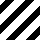
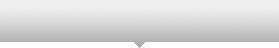
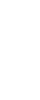
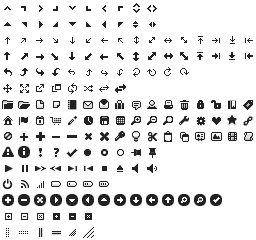
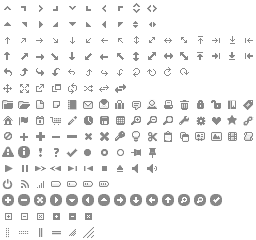
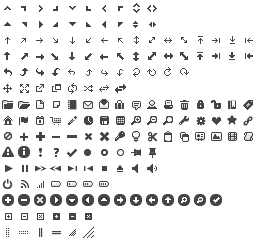
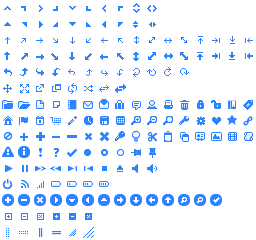
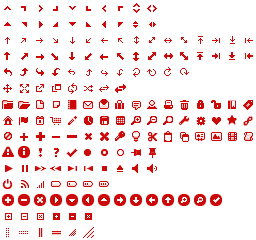
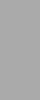
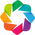
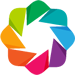
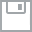
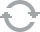
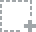
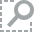
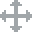
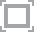
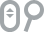

In [47]:
from bokeh.plotting import figure, output_notebook,show,vplot
output_notebook()

In [48]:
import pandas.io.data
import datetime
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))


In [49]:
# prepare some data
x = aapl.Low
y = aapl.High

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# These are glyphs
p.circle(x, y)
p.line(x,x*y.mean()/x.mean())

# show the results
show(p)

At its core, Bokeh is built up with Plots and Glyphs. Plots are created with the figure keyword and then glyphs are visuals that are added to the visualization. The visuals are scalable, interactive and savable. You can even create vectorized colors.

In [50]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [51]:
p1 = figure(title="Titanic Ages Dead",x_axis_label = 'Age',y_axis_label = 'Count')
#construct the histogram
hist, edges = np.histogram(data.Age[data.Survived==0].values, density=True, bins=50)
#Construct your x axis
x = np.linspace(data.Age.min(),data.Age.max(),100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')

p2 = figure(title="Titanic Ages Survived",x_axis_label = 'Age',y_axis_label = 'Count')

hist, edges = np.histogram(data.Age[data.Survived==1].values, density=True, bins=50)
x = np.linspace(data.Age.min(),data.Age.max(),100)
p2.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')


show(vplot(p1,p2))